<a href="https://colab.research.google.com/github/SiracencoSerghei/linear_algebra/blob/main/2.5_systems/2.5_3_spaceAfterRREF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import sympy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

---
# Matrix spaces after row reduction
---

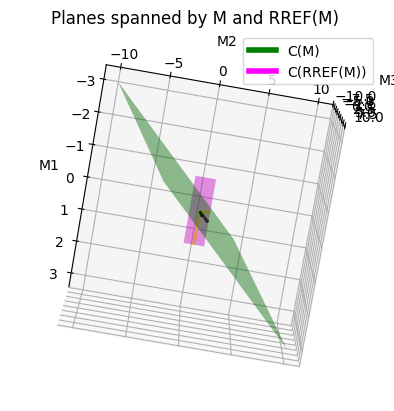

In [9]:

# Create the matrix M
M = np.array([[1, 2],
              [3, 7],
              [9, 1]])

# Compute the RREF of M
Mr, _ = sympy.Matrix(M).rref()
Mr = np.array(Mr).astype(np.float64)  # Convert to numpy array for easier manipulation

# Create a mesh grid for plotting the planes
s, t = np.meshgrid(np.linspace(-1, 1, 50), np.linspace(-1, 1, 50))

# Define the planes spanned by M and Mr
plane_M = M[0, 0] * s + M[0, 1] * t, M[1, 0] * s + M[1, 1] * t, M[2, 0] * s + M[2, 1] * t
plane_Mr = Mr[0, 0] * s + Mr[0, 1] * t, Mr[1, 0] * s + Mr[1, 1] * t, Mr[2, 0] * s + Mr[2, 1] * t

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the plane corresponding to M
ax.plot_surface(plane_M[0], plane_M[1], plane_M[2], color='green', alpha=0.5)

# Plot the plane corresponding to Mr (RREF(M))
ax.plot_surface(plane_Mr[0], plane_Mr[1], plane_Mr[2], color='magenta', alpha=0.5)

# Normalize M to draw basis vectors
M_norm = M / np.linalg.norm(M, axis=0)

# Plot the basis vectors for M
ax.quiver(0, 0, 0, M_norm[0, 0], M_norm[1, 0], M_norm[2, 0], color='black', linewidth=2)
ax.quiver(0, 0, 0, M_norm[0, 1], M_norm[1, 1], M_norm[2, 1], color='black', linewidth=2)

# Plot the basis vectors for Mr
Mr_norm = Mr / np.linalg.norm(Mr, axis=0)
ax.quiver(0, 0, 0, Mr_norm[0, 0], Mr_norm[1, 0], Mr_norm[2, 0], color='yellow', linewidth=2)
ax.quiver(0, 0, 0, Mr_norm[0, 1], Mr_norm[1, 1], Mr_norm[2, 1], color='yellow', linewidth=2)

# Customize the plot
ax.set_xlabel('M1')
ax.set_ylabel('M2')
ax.set_zlabel('M3')
ax.set_title('Planes spanned by M and RREF(M)')

# Create custom legend handles
legend_handles = [
    Line2D([0], [0], color='green', lw=4, label='C(M)'),
    Line2D([0], [0], color='magenta', lw=4, label='C(RREF(M))')
]
ax.legend(handles=legend_handles)
ax.grid(True)

# Adjust the view angle for better visualization
ax.view_init(elev=100, azim=10)

plt.show()
